# E-13-프로젝트 : 주식 예측에 도전해 보자  
  
## 시계열 예측
* 시계열(Time-Series) 데이터 : 시간 순서대로 발생한 데이터의 수열  
* $Y=\{Y_t|t\in T,~T:index~ set\}$  
* 사실상 미래 예측은 불가능하지만 그럼에도 예측하고자 한다면 다음 조건 만족
    - 과거의 데이터에 일정한 패턴이 발견된다.  
    - 과거의 패턴은 미래에도 동일하게 반복될 것이다.  
* 즉, 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능  
* 안정적(Stationary) : "시계열 데이터의 통계적 특성이 변하지 않는다"  
* 직관적 의미 : 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다는 뜻  
* 매우 불규칙해 보이는 변화에도 불구하고 일정 단위 기간에 일정한 변화의 패턴이 유지된다면, 일정한 변동 프로세스가 만들어 내는 안정성(stationarity)에 의해 어느 정도 오차 범위 내에서 미래 예측 가능  
* 시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않습니다. 어떤 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성(stationarity)이 훼손될 여지가 있기 때문입니다. 그럼에도 불구하고, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보입니다. 그럼 다음 스텝에서 시계열의 안정적(Stationary)인 특성이란 무엇인지 좀 더 구체적으로 살펴보겠습니다.  
  
## 안정적 시계열  
1. 시간의 추이와 관계 없이 평균이 불변  
2. 시간의 추이와 관계 없이 분산이 불변  
3. 두 시점 간의 공분산이 기준시점과 무관 (자기공분산, autocovariance)  
* 참고 : https://en.wikipedia.org/wiki/Autocovariance#Auto-covariance_of_stochastic_processes

## 1. 프로젝트 : 주식 예측에 도전해 보자 - samsung  
* 파일 다운로드 : https://finance.yahoo.com/
```
$ mv ~/다운로드/005930.KS.csv ~/aiffel/stock_prediction/data
# 환경설정을 영어로 사용하는 경우는 아래 명령어를 입력하세요.
$ mv ~/Downloads/005930.KS.csv ~/aiffel/stock_prediction/data
```

### STEP 1 : 시계열 데이터 준비  
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume  
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 Close만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-04,54800.0,57600.0,54600.0,57400.0,54873.816406,24765728
1,2020-03-05,57600.0,58000.0,56700.0,57800.0,55256.210938,21698990
2,2020-03-06,56500.0,57200.0,56200.0,56500.0,54013.425781,18716656
3,2020-03-09,56500.0,56500.0,56500.0,56500.0,54013.425781,0
4,2020-03-10,53800.0,54900.0,53700.0,54600.0,52197.046875,32106554


In [2]:
# Time Series 생성 - 이게 우리가 찾는 거
# Date를 index_col로 지정해 주었습니다. 

df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-03-04    57400.0
2020-03-05    57800.0
2020-03-06    56500.0
2020-03-09    56500.0
2020-03-10    54600.0
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행  
* 결측치 처리  
* 로그 변환

#### 시계열 안정성의 정성적 분석

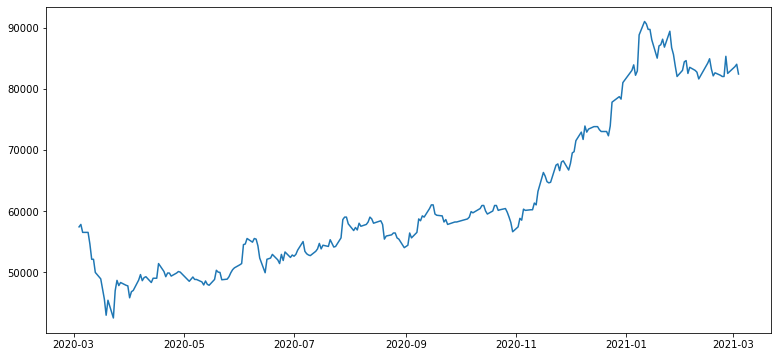

In [3]:
# 시각화를 통해 안정성(Stationarity) 여부를 확인

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [4]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

#### 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?  
  
이제 우리는 위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보겠습니다. 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 이것이 어떻게 가능할까요?  
  
크게 두 가지를 언급할 것입니다. 한가지는 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도들이고, 다른 하나는 시계열 분해(Time series decomposition)라는 기법을 적용하는 것입니다.  
  
#### 보다 Stationary한 시계열로 가공하기  
  
##### 로그함수 변환  
가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다. 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

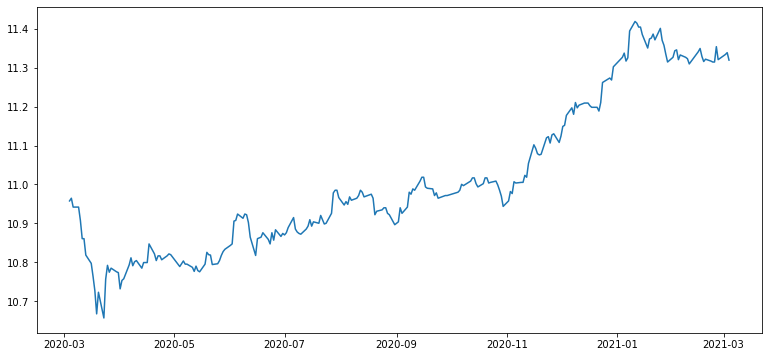

In [5]:
# 로그 변환 시도 
ts_log = np.log(ts)
plt.plot(ts_log)

### STEP 3 : 시계열 안정성 분석  
* 정성적 그래프 분석  
* 정량적 Augmented Dicky-Fuller Test  
* 시계열 분해(Time Series Decomposition)  
* Residual 안정성 확인

#### 통계치 시각화 함수 (Rolling Statistics)  
아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다. 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

In [6]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


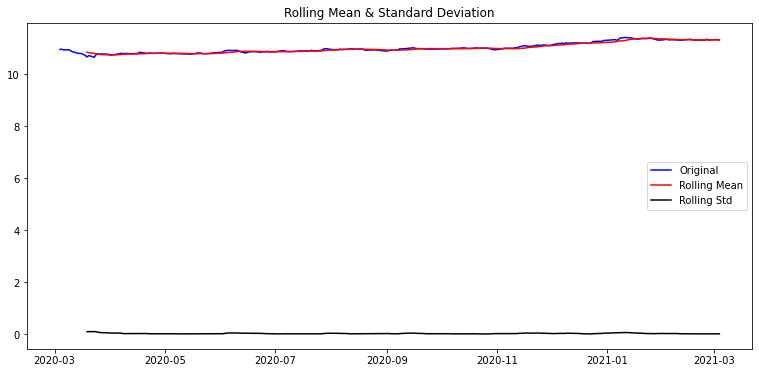

In [7]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#### p-value  
p-value의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.

#### statsmodels 패키지와 adfuller 메소드  
  
statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다. 아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.  
  
아래 코드를 수행하기 위해 먼저 다음과 같이 statsmodels 패키지를 설치합니다.  
```
$ pip install statsmodels
```

In [8]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [9]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.120052
p-value                          0.947404
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


#### 시계열 분해(Time series decomposition)  
statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그변환 단계(ts_log)에서부터 출발해 봅시다.

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.  

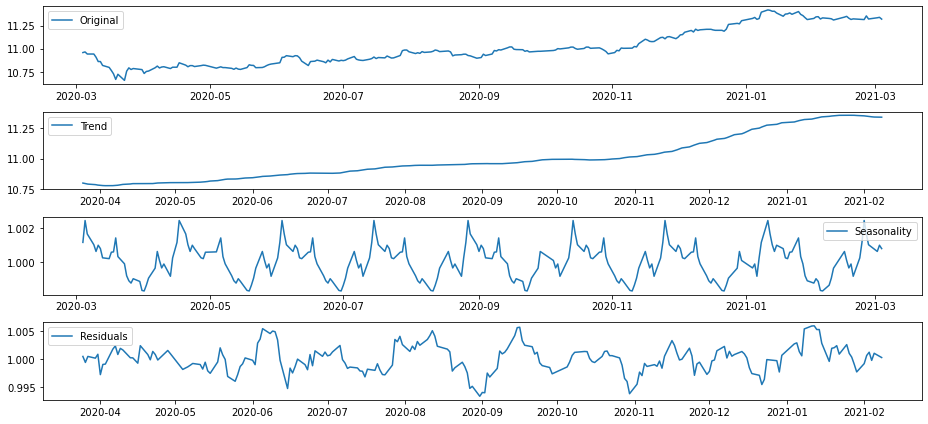

In [10]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Residual에 대해 안정성 여부

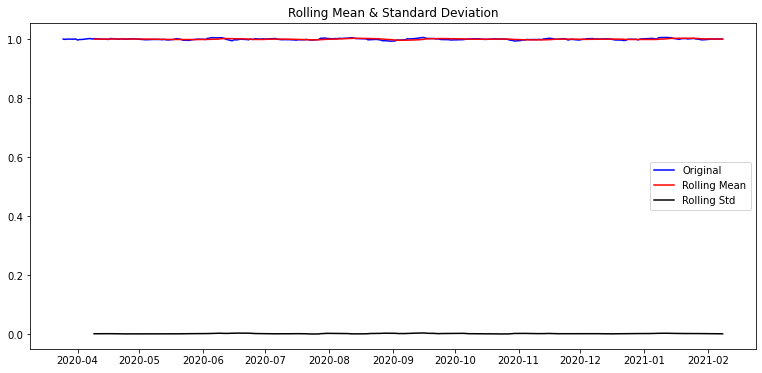

In [11]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [12]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.949797
p-value                          0.000028
#Lags Used                       0.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성  
* 학습, 테스트 데이터셋 분리

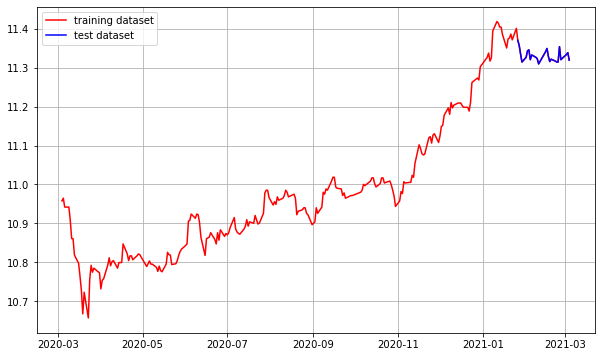

In [13]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기  
* ACF, PACF 그려보기 -> p,q 구하기  
* 차분 안정성 확인 -> d 구하기

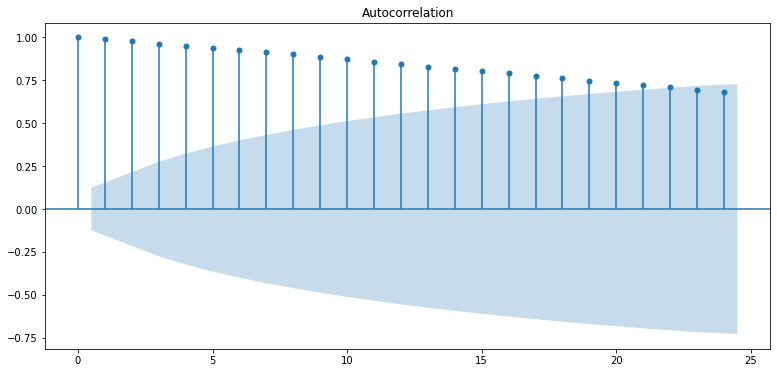

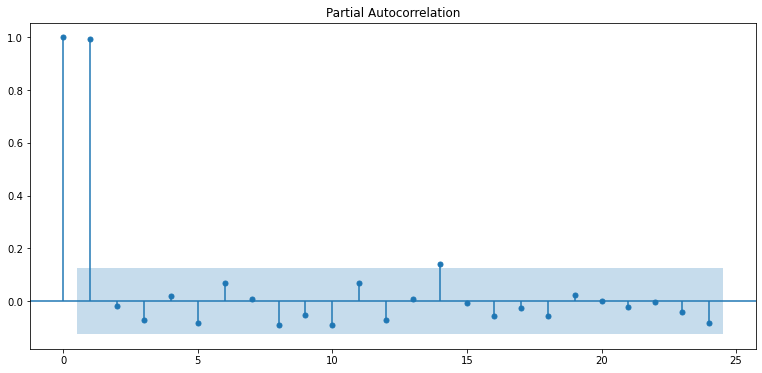

In [14]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.626852e+01
p-value                        3.507208e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.066674e+00
p-value                        5.059635e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


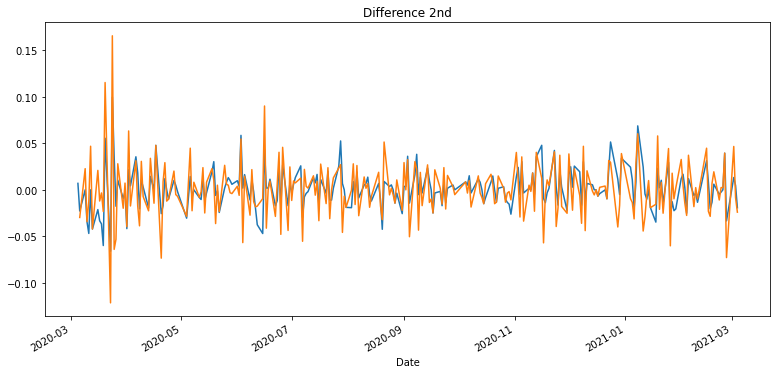

In [15]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트  
* ARIMA 모델 빌드와 훈련  
* 모델 테스트 및 플로팅  
* 최종 예측 모델 정확도 측정(MAPE)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 535.346
Method:                       css-mle   S.D. of innovations              0.021
Date:                Thu, 04 Mar 2021   AIC                          -1064.692
Time:                        19:26:30   BIC                          -1054.498
Sample:                             1   HQIC                         -1060.576
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.427      0.153      -0.001       0.005
ar.L1.D.Close    -0.0304      0.067     -0.452      0.651      -0.162       0.102
                                    Root

/home/aiffel-dj42/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj42/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

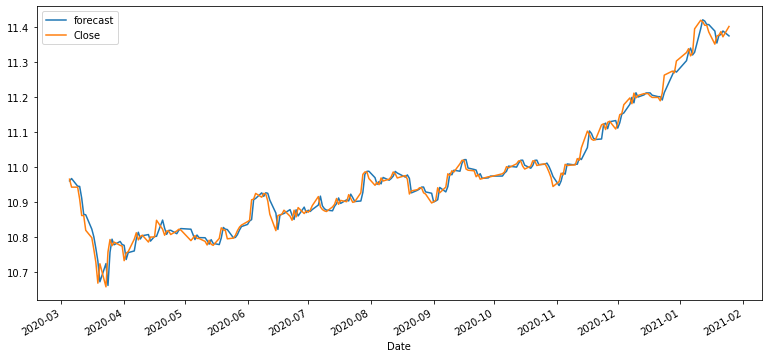

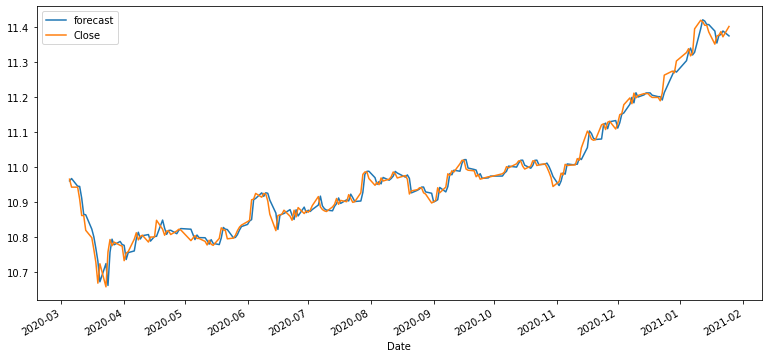

In [17]:
# 훈련데이터에 대해 ARIMA 모델이 잘 fit하는지 시각적으로 확인해 보겠습니다.

fitted_m.plot_predict()

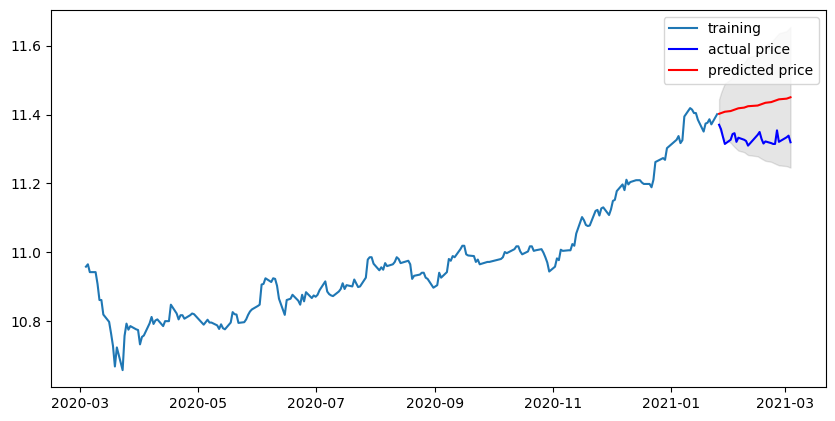

In [18]:
# forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [19]:
# 최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당합니다.
# np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산해 보았습니다.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  73820175.11983076
MAE:  8318.446948251547
RMSE:  8591.866800633652
MAPE: 10.01%


## 2. 다른 주식 종목 예측해 보기  
* 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

### STEP 1 : 시계열 데이터 준비  
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume  
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 Close만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/TWTR.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [21]:
# Time Series 생성 - 이게 우리가 찾는 거
# Date를 index_col로 지정해 주었습니다. 

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TWTR.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2013-11-07    44.900002
2013-11-08    41.650002
2013-11-11    42.900002
2013-11-12    41.900002
2013-11-13    42.599998
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행  
* 결측치 처리  
* 로그 변환

#### 시계열 안정성의 정성적 분석

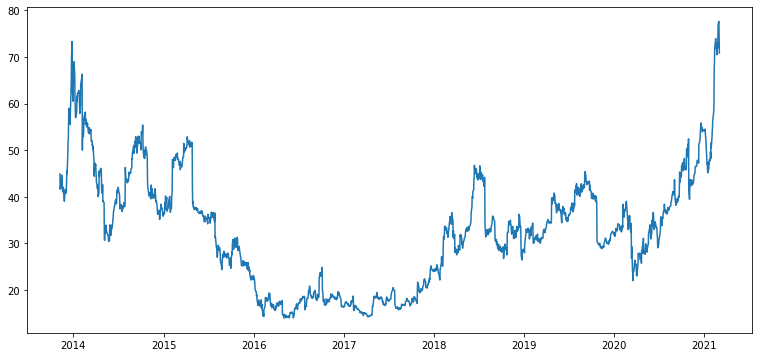

In [22]:
# 시각화를 통해 안정성(Stationarity) 여부를 확인

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [23]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

#### 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?  
  
이제 우리는 위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보겠습니다. 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 이것이 어떻게 가능할까요?  
  
크게 두 가지를 언급할 것입니다. 한가지는 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도들이고, 다른 하나는 시계열 분해(Time series decomposition)라는 기법을 적용하는 것입니다.  
  
#### 보다 Stationary한 시계열로 가공해 가기  
  
##### 로그함수 변환  
가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다. 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

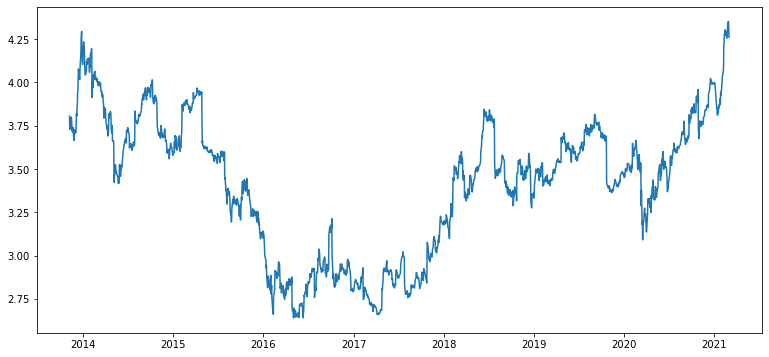

In [24]:
# 로그 변환 시도 
ts_log = np.log(ts)
plt.plot(ts_log)

### STEP 3 : 시계열 안정성 분석  
* 정성적 그래프 분석  
* 정량적 Augmented Dicky-Fuller Test  
* 시계열 분해(Time Series Decomposition)  
* Residual 안정성 확인

#### 통계치 시각화 함수 (Rolling Statistics)  
아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다. 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

In [25]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


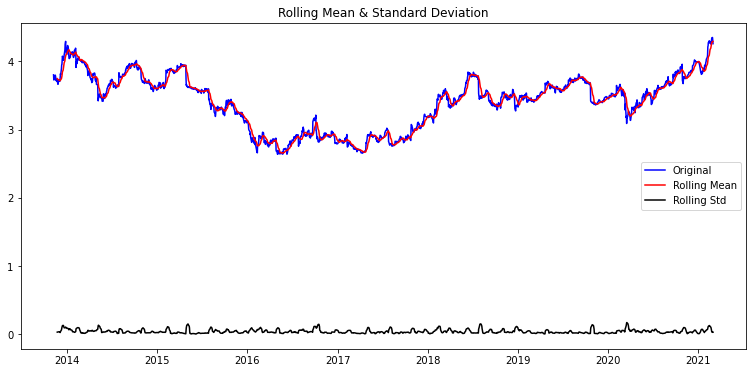

In [26]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#### p-value  
p-value의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.

#### statsmodels 패키지와 adfuller 메소드  
  
statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다. 아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.  
  
아래 코드를 수행하기 위해 먼저 다음과 같이 statsmodels 패키지를 설치합니다.  
```
$ pip install statsmodels
```

In [27]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [28]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.426678
p-value                           0.569422
#Lags Used                        2.000000
Number of Observations Used    1838.000000
Critical Value (1%)              -3.433913
Critical Value (5%)              -2.863114
Critical Value (10%)             -2.567608
dtype: float64


#### 시계열 분해(Time series decomposition)  
statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그변환 단계(ts_log)에서부터 출발해 봅시다.

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.  

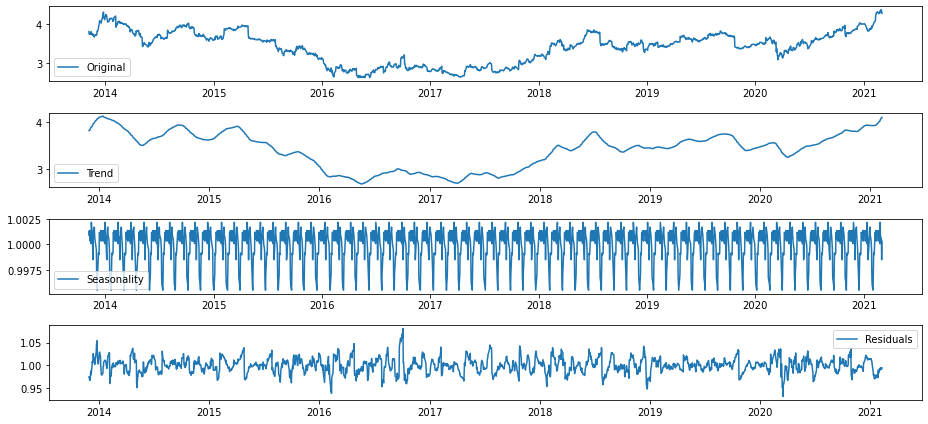

In [29]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Residual에 대해 안정성 여부

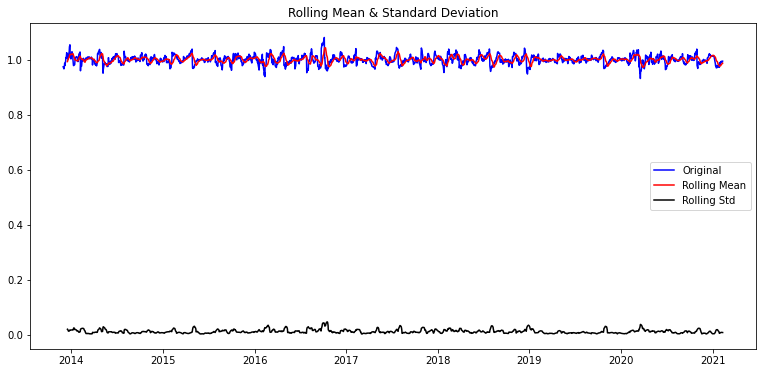

In [30]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [31]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.271972e+01
p-value                        9.887460e-24
#Lags Used                     2.200000e+01
Number of Observations Used    1.788000e+03
Critical Value (1%)           -3.434013e+00
Critical Value (5%)           -2.863158e+00
Critical Value (10%)          -2.567631e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성  
* 학습, 테스트 데이터셋 분리

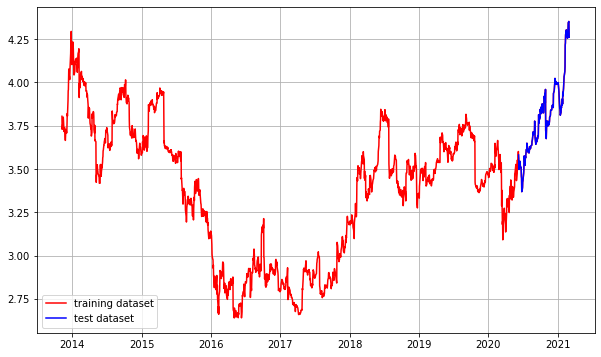

In [32]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기  
* ACF, PACF 그려보기 -> p,q 구하기  
* 차분 안정성 확인 -> d 구하기

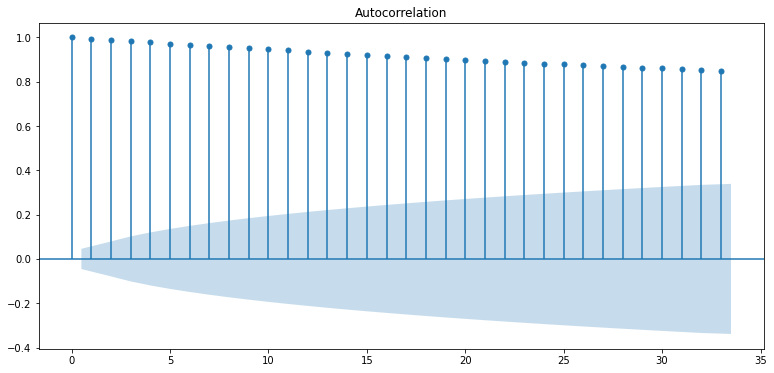

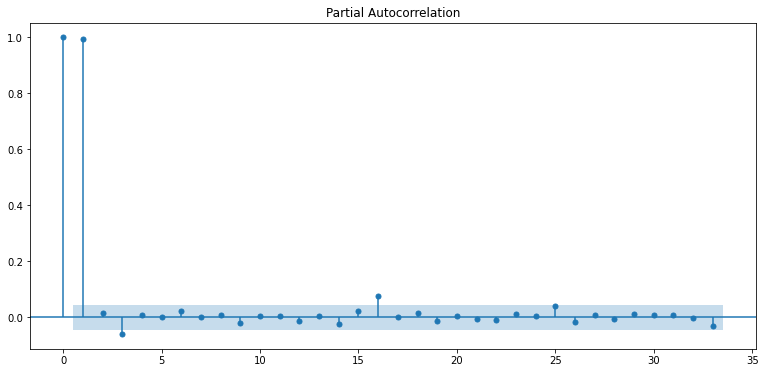

In [33]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -29.312860
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1838.000000
Critical Value (1%)              -3.433913
Critical Value (5%)              -2.863114
Critical Value (10%)             -2.567608
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.438363e+01
p-value                        9.065729e-27
#Lags Used                     2.500000e+01
Number of Observations Used    1.813000e+03
Critical Value (1%)           -3.433962e+00
Critical Value (5%)           -2.863136e+00
Critical Value (10%)          -2.567619e+00
dtype: float64


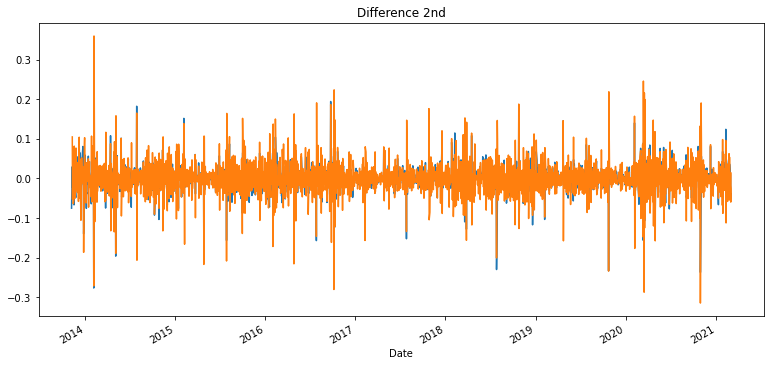

In [34]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트  
* ARIMA 모델 빌드와 훈련  
* 모델 테스트 및 플로팅  
* 최종 예측 모델 정확도 측정(MAPE)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1655
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3205.794
Method:                       css-mle   S.D. of innovations              0.035
Date:                Thu, 04 Mar 2021   AIC                          -6405.588
Time:                        19:26:32   BIC                          -6389.353
Sample:                             1   HQIC                         -6399.570
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.001     -0.147      0.884      -0.002       0.002
ar.L1.D.Close    -0.0257      0.025     -1.046      0.296      -0.074       0.023
                                    Root

/home/aiffel-dj42/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj42/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

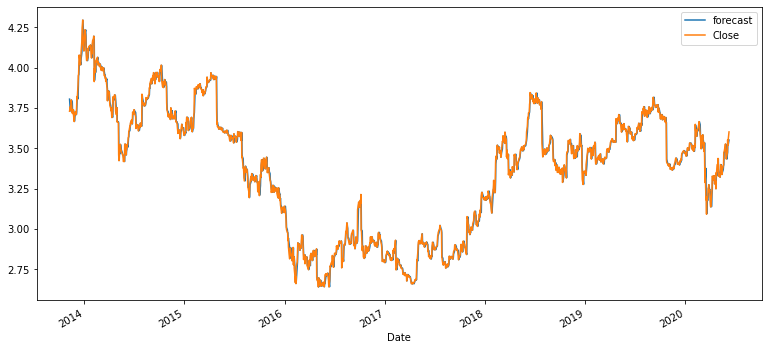

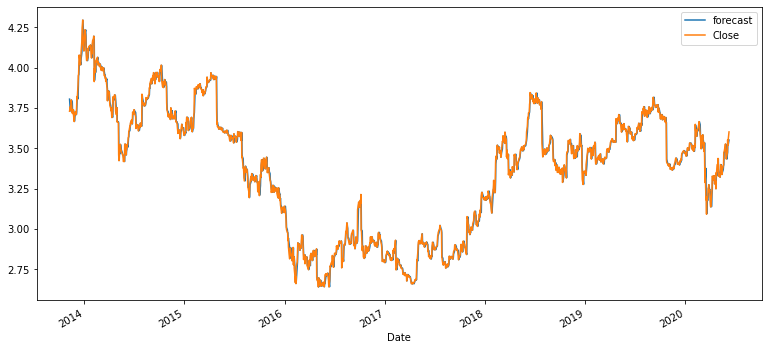

In [36]:
# 훈련데이터에 대해 ARIMA 모델이 잘 fit하는지 시각적으로 확인해 보겠습니다.

fitted_m.plot_predict()

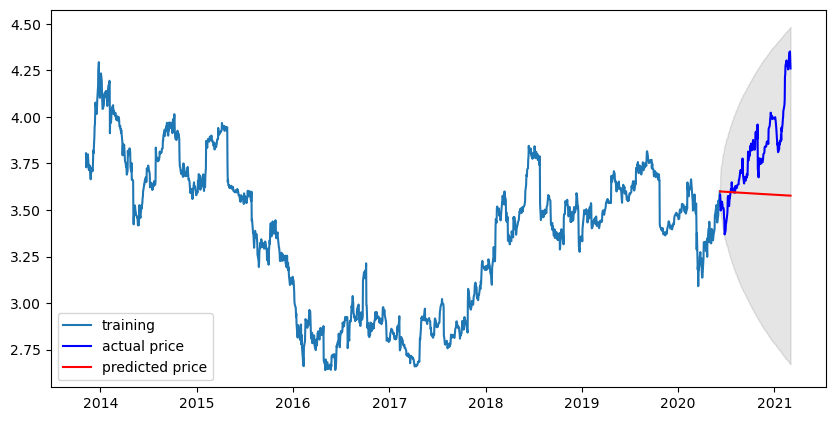

In [37]:
# forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [38]:
# 최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당합니다.
# np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산해 보았습니다.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  203.9367675339589
MAE:  10.465453537898545
RMSE:  14.280643106455637
MAPE: 20.01%


## 회고  
  
시계열 봐도봐도 모르겠지만 죽기 전엔 알 수 있겠죠... 자주 보면 익숙해지겠죠... 열심히 하겠습니다. 나 화이팅!!